In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt



In [3]:
def check_if_outlier(DF : pd.DataFrame, feature : str = '', degree = 2):
        """Funkcja zwracająca Prawdę lub Fausz w zależności czy element jest odstający.
        dane wejściowe - pd.DataFrame z wartościami numerycznymi. 
        dane wyjściowe pd.Series zwracający True i False."""
        std_dev = DF[feature].std()
        miu = DF[feature].mean()
        ret_val = []
        for elt in DF[feature]:
            if elt > miu + degree * std_dev or elt < miu - degree * std_dev:
                ret_val.append(True)
            else: 
                ret_val.append(False)
        return pd.Series(ret_val)

def opisz_dane (df: pd.DataFrame) -> pd.DataFrame:
    wiersze = ('wszystkie elementy','unikalne elementy', 'braki (NA/nan)', 'max', 'min', 'średnia arytmetyczna', 'mediana', 'moda',
    'ochylenie standardowe', 'ilosc elementów odstających')

    is_numeric = {column_name: True if ('int' in str(df[column_name].dtype)  or df[column_name].dtype =='float') else False for column_name in df.columns}
    all_items = {column_name : df[column_name].count() for column_name in df.columns}
    unique_items = {column_name : df[column_name].value_counts().count() for column_name in df.columns}
    brak_w_items = {column_name : sum(df[column_name].isna()) for column_name in df.columns}
    max_items = {column_name: df[column_name].max() if is_numeric[column_name] else pd.NA for column_name in df.columns}
    min_items = {column_name: df[column_name].min() if is_numeric[column_name] else pd.NA for column_name in df.columns}
    average_items = {column_name: df[column_name].mean() if is_numeric[column_name] else pd.NA for column_name in df.columns}
    median_items = {column_name: df[column_name].median() if is_numeric[column_name] else pd.NA for column_name in df.columns}
    mode_items = {column_name: df[column_name].mode() if is_numeric[column_name] else Counter(df[column_name]).most_common() \
    if len(Counter(df[column_name]).most_common()) < 3 else pd.NA for column_name in df.columns}
    std_deviation = {column_name: df[column_name].std() if is_numeric[column_name] else pd.NA for column_name in df.columns}

    outliers = {column_name: check_if_outlier(df, column_name).sum() if is_numeric[column_name] else pd.NA for column_name in df.columns}

    serie= [all_items, unique_items, brak_w_items, max_items, 
    min_items, average_items,median_items,mode_items,std_deviation,outliers]

#    print(pd.DataFrame(serie, index = wiersze))
    return pd.DataFrame(serie, index = wiersze)

def czy_numeryczna(s: pd.Series):
    ret_val = False
    if 'int' in str(s.dtype) or s.dtype == 'float':
        ret_val = True
    return ret_val

def jaki_plot(r: pd.Series, c: pd.Series):
    match czy_numeryczna(r), czy_numeryczna(c):
        case True, True:
            return 'scatter'
        case False, False:
            return 'hitmapa'
        case False, True:
            return 'h_bar'
        case True, False:
            return 'box_plot'


def ladny_plot(DF: pd.DataFrame, mainish = None):
    col_names = DF.columns
    print(col_names)

    fig, ax = plt.subplots(nrows = DF.shape[1],ncols = DF.shape[1],figsize=(len(col_names)*4, len(col_names)*4), tight_layout = True)

    for row_id, row_name in enumerate(col_names):
        for col_id, col_name in enumerate(col_names):
            #print(f'{row_id:^3} {row_name:^10} - {col_id:^3} {col_name:^10} {czy_numeryczna(DF[row_name]):^7} {czy_numeryczna(DF[col_name]):^7} {jaki_plot(DF[row_name],DF[col_name])}')
            
            if row_id == col_id:
                sns.histplot(data = DF[row_name], ax = ax[row_id, col_id]).set(xlabel=None, ylabel = None)
                ax[row_id, col_id].set_title(row_name)
                continue
            if (czy_numeryczna(DF[row_name]), czy_numeryczna(DF[col_name])) == (True, True):
                sns.scatterplot(x = DF[col_name], y = DF[row_name], ax=ax[row_id, col_id], size = 1, hue = mainish, alpha= 0.4).set(xlabel=None,ylabel = None)
            elif (czy_numeryczna(DF[row_name]), czy_numeryczna(DF[col_name])) == (True, False):
                sns.boxplot(x = DF[col_name], y = DF[row_name], ax=ax[row_id, col_id], hue  = mainish).set(xlabel=None,ylabel = None)
            elif (czy_numeryczna(DF[row_name]), czy_numeryczna(DF[col_name])) == (False, True):
                sns.stripplot(x = DF[col_name], y = DF[row_name], jitter=0.4, ax=ax[row_id, col_id], hue = mainish, alpha= 0.4).set(xlabel=None,ylabel = None)
            elif (czy_numeryczna(DF[row_name]), czy_numeryczna(DF[col_name])) == (False, False):
                sns.heatmap(data= DF.groupby([row_name, col_name]).size().unstack(), ax=ax[row_id, col_id],fmt = '.0f',  cbar = False, annot = True, cmap = "viridis", linewidths = 2).set(xlabel=None,ylabel = None)
                                       #groupby(['Pclass', 'Survived']).size().unstack())
                #print(DF[[row_name,col_name]].groupby(col_name).count())
       
        for a, c in zip(ax[0], col_names):
            a.set_title(c)
        for a, c in zip(ax[:,0], col_names):
            a.set_ylabel(c)
    
    fig.tight_layout()
    plt.show()

In [10]:
train_df = pd.read_csv('Titanic-train.csv')
train_df.columns
#train_df

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
import re
from collections import Counter

train_df['Title']=train_df['Name'].apply(lambda x :x[x.index(',')+2: x.index('.')])
titele = [x[0] for x in Counter(train_df['Title']).most_common(4)]
print(titele)
train_df['Title'] = train_df['Title'].apply(lambda x : x if x in titele else 'Other')
train_df

['Mr', 'Miss', 'Mrs', 'Master']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [27]:
train_df['Number_of_cabins'] = train_df['Cabin'].apply(lambda x: 'no_info' if pd.isna(x) else str(len(x.split())))

In [25]:
train_df['Deck'] = train_df['Cabin'].apply(lambda x:  'no_info' if pd.isna(x) else x[0])
train_df['Deck'].unique()

array(['no_info', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

Index(['Survived', 'Sex', 'Title', 'Deck', 'Number_of_cabins', 'Fare'], dtype='object')


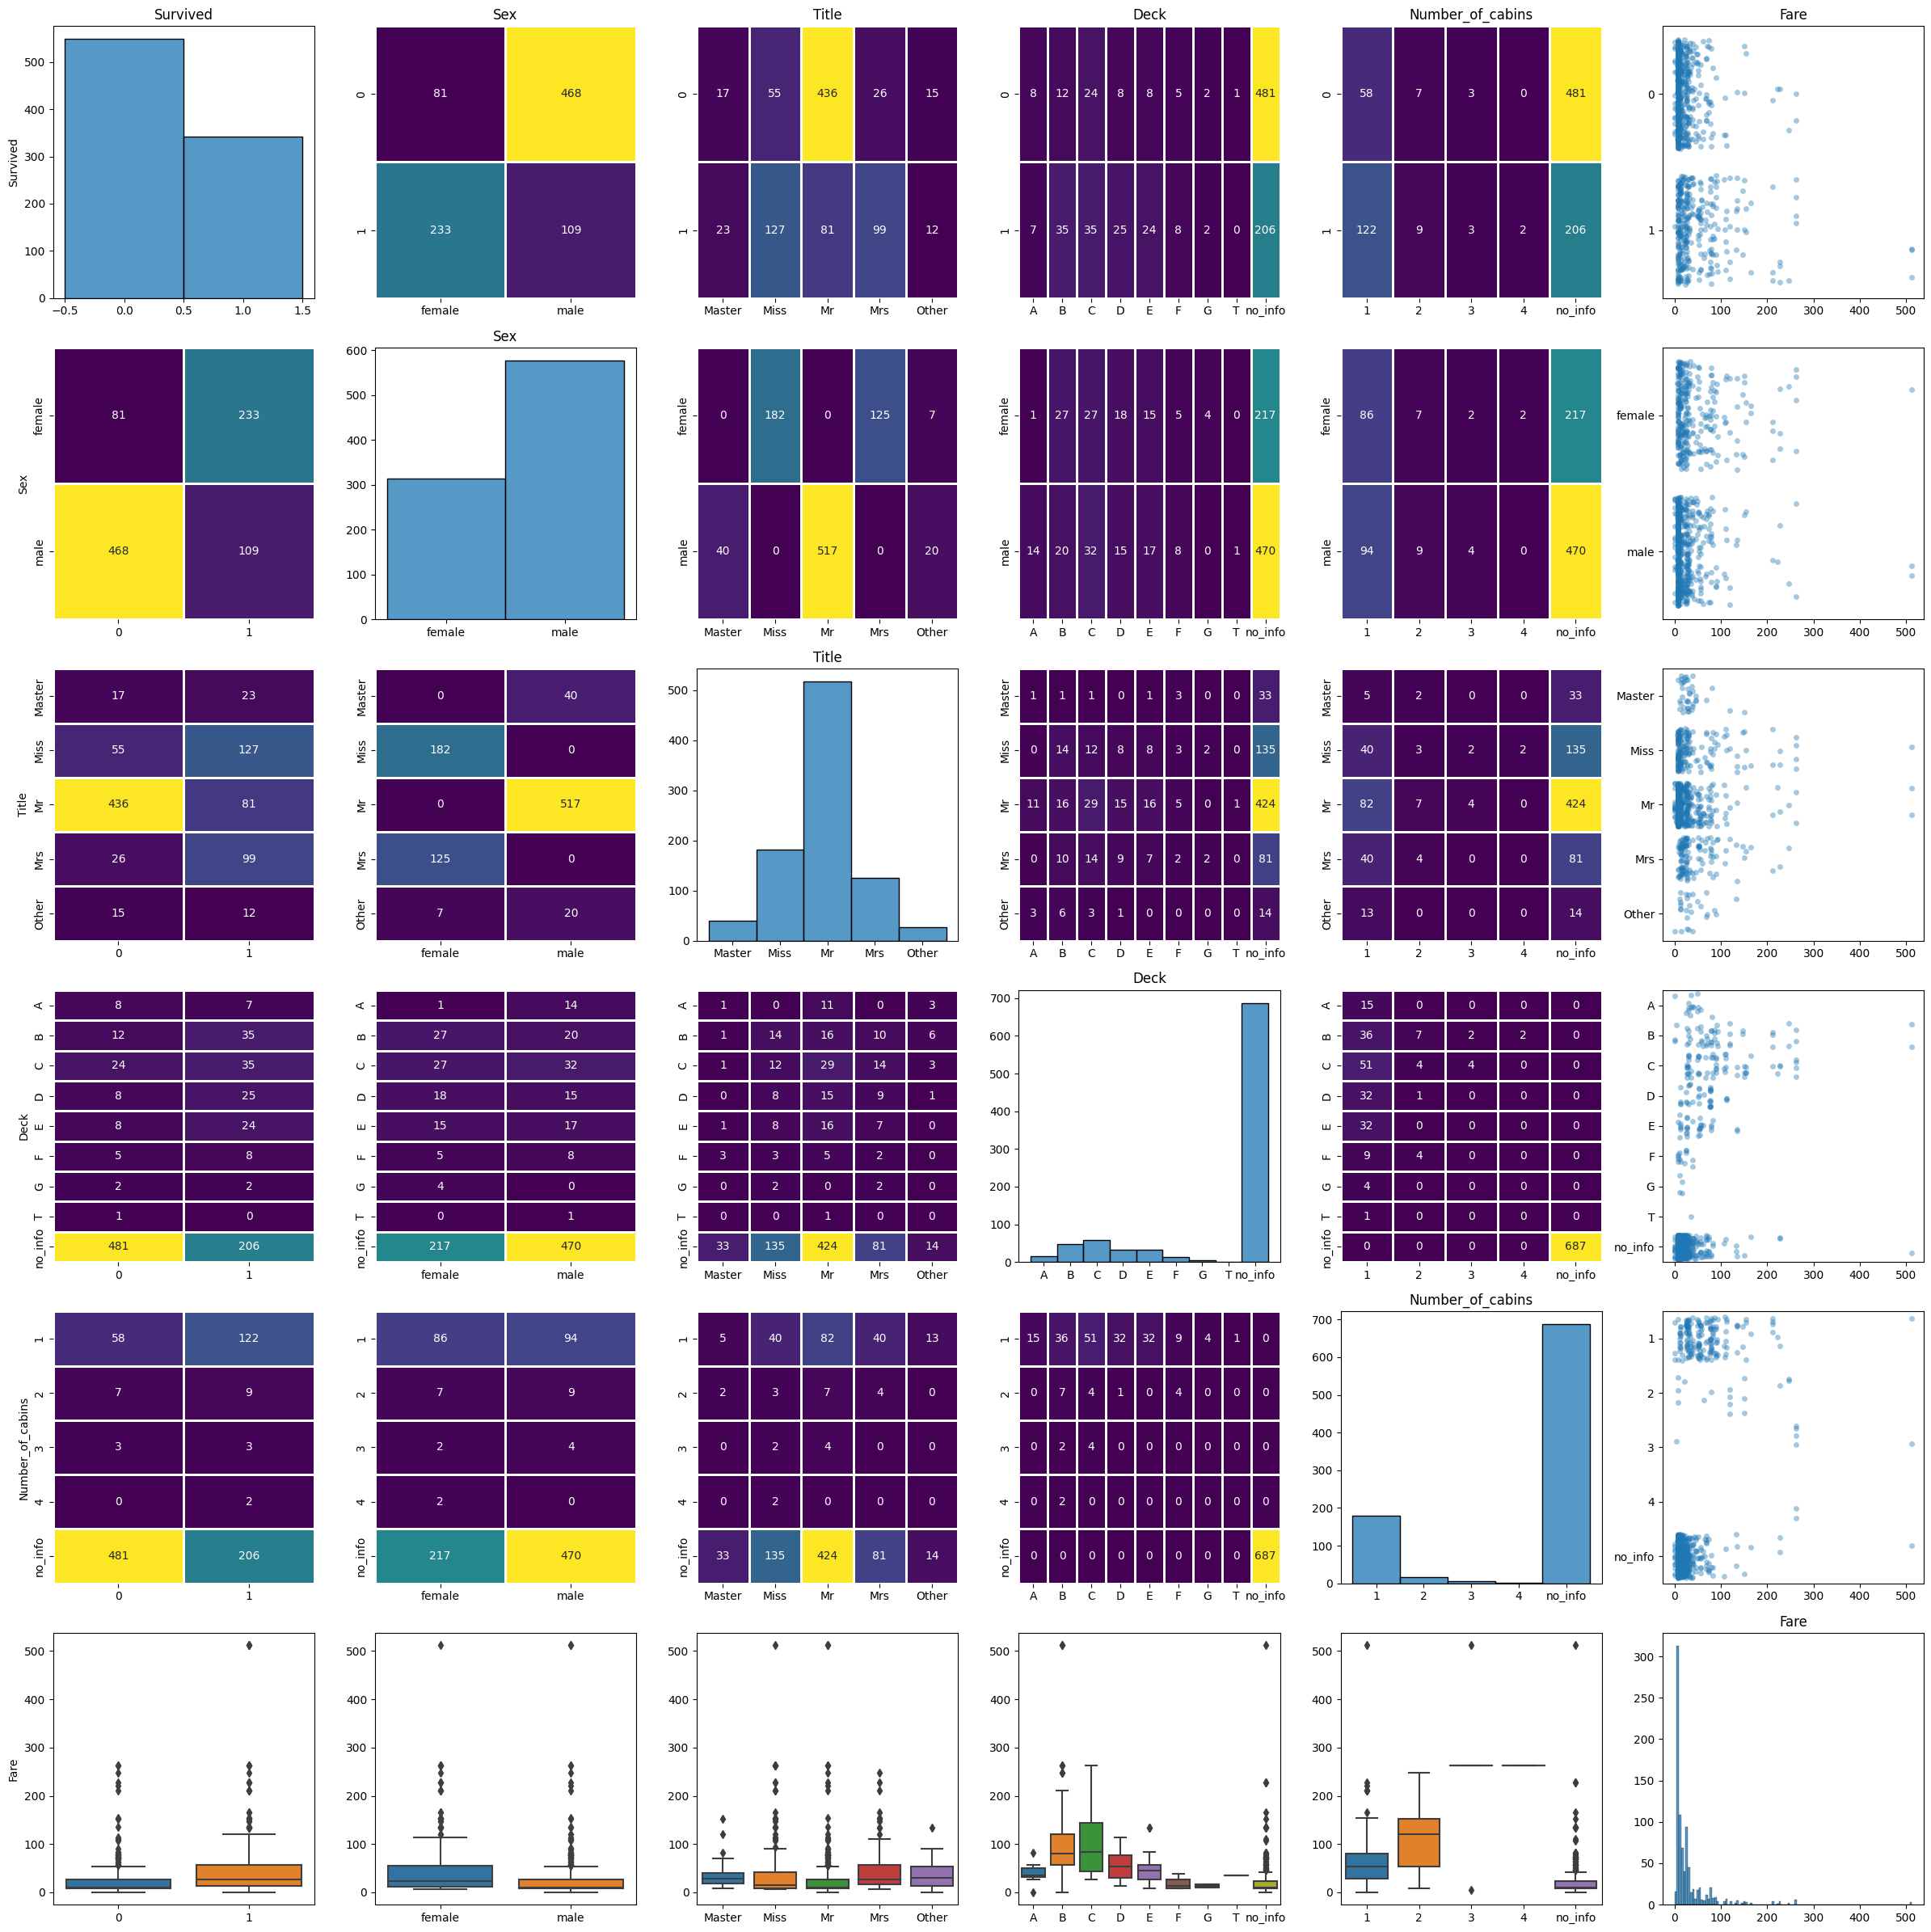

In [30]:
ladny_plot(train_df[
    ['Survived', 'Sex', 'Title','Deck','Number_of_cabins','Fare']
    ].astype(
    {'Survived': 'category', 'Sex': 'category', 'Title': 'category', 'Deck': 'category', 'Number_of_cabins': 'category'}
    ))

In [7]:
train_df[[
    'Survived','Sex','Pclass'
]].astype({'Survived': 'category', 'Sex': 'category', 'Pclass': 'category'}).groupby(['Pclass','Sex','Survived']).size().unstack().index


MultiIndex([(1, 'female'),
            (1,   'male'),
            (2, 'female'),
            (2,   'male'),
            (3, 'female'),
            (3,   'male')],
           names=['Pclass', 'Sex'])